In [24]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import WrappedDiro2C, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules, plot_tree_leafs_for_class
from tasks.running_example import make_task
from sklearn.metrics import classification_report

In [12]:
clf_a, clf_b, X, y, feature_names = make_task()

In [13]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Global explanations

In [20]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(0,1)$

In [14]:
focus_class = '(0, 1)'

In [8]:
%%time
explainer = WrappedDiro2C(X, comparer, focus_class)
explanation = explainer.generate_global_explanation(gn_population_size=5000)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump((explainer, explanation), f, pickle.HIGHEST_PROTOCOL)

CPU times: user 16min 56s, sys: 11.8 s, total: 17min 8s
Wall time: 19min 13s


In [15]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explainer, explanation = pickle.load(f)

In [16]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [17]:
# Check for errors
is_explain_diff = explainer.clf_a.predict(X_explain) != explainer.clf_b.predict(X_explain)
(is_explain_diff != y_explain).sum(), len(y_explain)

(0, 45546)

In [18]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_explain, y_explain)
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    y_test = mclass_diff == np.where(comparer.class_names == focus_class)[0][0]
    print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=y_test, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, focus_class, X, mclass_diff, comparer.class_names, feature_names)
    
    print('\ngenerated data evaluation:')
    print(classification_report(y_explain, tree.predict(X_explain), target_names=class_names))

    print('\noriginal data evaluation:')
    print(classification_report(mclass_diff == np.where(comparer.class_names == focus_class)[0][0], tree.predict(X), target_names=class_names))

node #9: if (x1 > -203.89) and (x1 <= -8.54) and (x2 > 97.55) then class (0, 1) (covers 1.0 of 15414 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.95      1.00      0.97     28626
      (0, 1)       1.00      0.91      0.95     16920

    accuracy                           0.97     45546
   macro avg       0.98      0.96      0.96     45546
weighted avg       0.97      0.97      0.97     45546


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      1.00      1.00       566
      (0, 1)       1.00      1.00      1.00        34

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



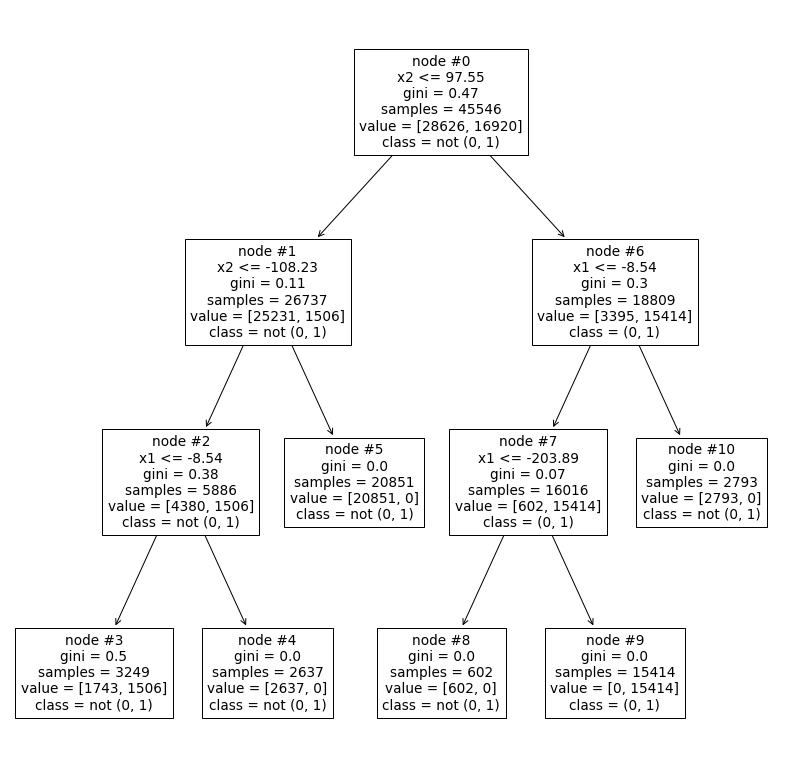

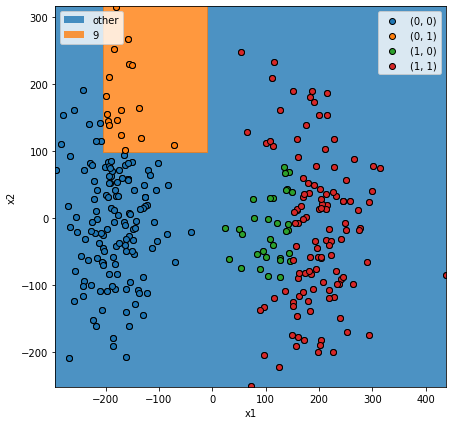

In [25]:
explain(max_depth=3)

This explanation has already perfect performance on the original data, but only 91% recall on the focus class.

node #11: if (x1 > -203.89) and (x1 <= -8.54) and (x2 > 97.55) then class (0, 1) (covers 1.0 of 15414 instances)
node #5: if (x1 > -16.38) and (x1 <= -8.54) and (x2 <= -108.23) then class (0, 1) (covers 1.0 of 1506 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      1.00      1.00     28626
      (0, 1)       1.00      1.00      1.00     16920

    accuracy                           1.00     45546
   macro avg       1.00      1.00      1.00     45546
weighted avg       1.00      1.00      1.00     45546


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      1.00      1.00       566
      (0, 1)       1.00      1.00      1.00        34

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



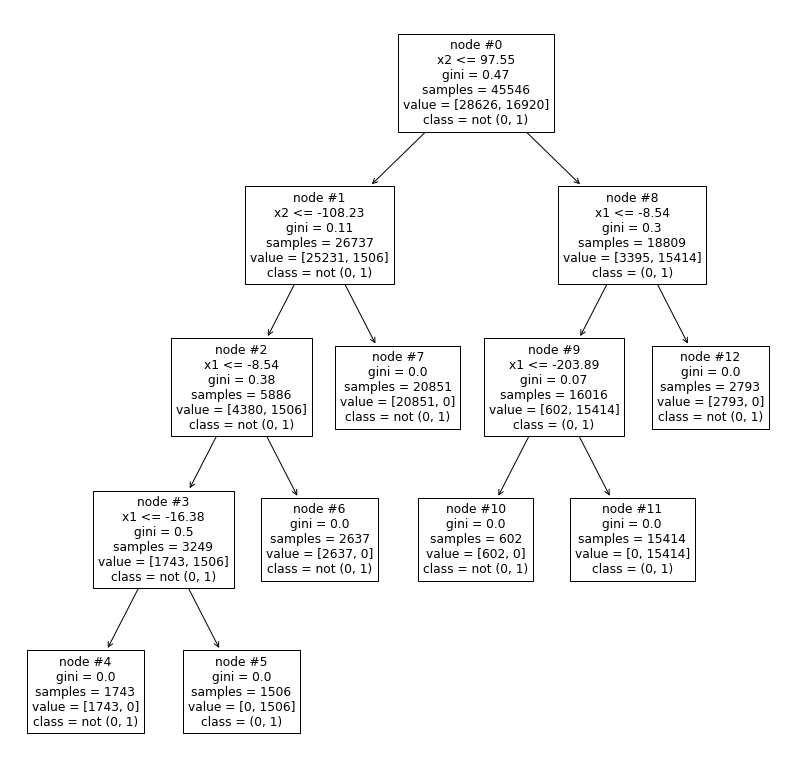

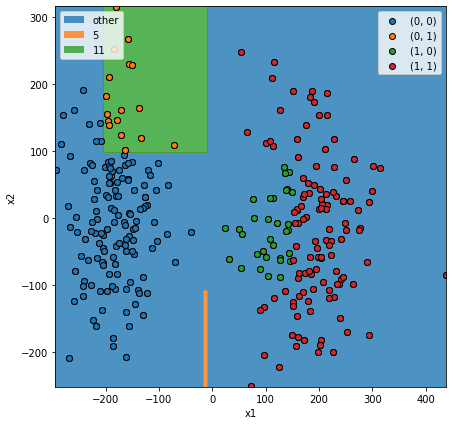

In [29]:
explain(max_depth=4)

This explanation now has perfect performance on the generated data set as well. This indicates, that it discovered new instances, that classify $(0,1)$.

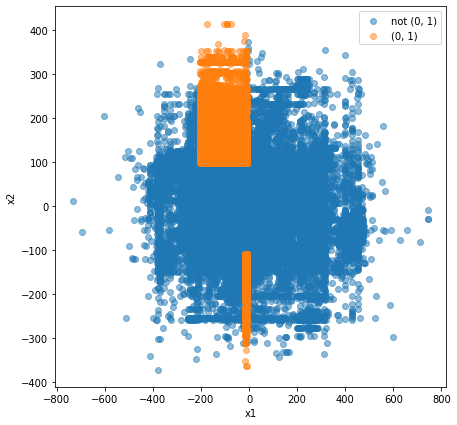

In [28]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [30]:
focus_class = '(1, 0)'

In [10]:
%%time
explainer = WrappedDiro2C(X, comparer, focus_class)
explanation = explainer.generate_global_explanation(gn_population_size=5000)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump((explainer, explanation), f, pickle.HIGHEST_PROTOCOL)

CPU times: user 16min 8s, sys: 9.99 s, total: 16min 18s
Wall time: 17min 59s


In [38]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explainer, explanation = pickle.load(f)

In [39]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [40]:
# Check for errors
is_explain_diff = explainer.clf_a.predict(X_explain) != explainer.clf_b.predict(X_explain)
(is_explain_diff != y_explain).sum(), len(y_explain)

(0, 68230)

node #4: if (x1 > -8.55) and (x1 <= 150.61) and (x2 <= 97.54) then class (1, 0) (covers 0.95 of 35189 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      0.95      0.97     34813
      (1, 0)       0.95      1.00      0.97     33417

    accuracy                           0.97     68230
   macro avg       0.97      0.97      0.97     68230
weighted avg       0.98      0.97      0.97     68230


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      0.97      0.98       536
      (1, 0)       0.80      1.00      0.89        64

    accuracy                           0.97       600
   macro avg       0.90      0.99      0.94       600
weighted avg       0.98      0.97      0.97       600



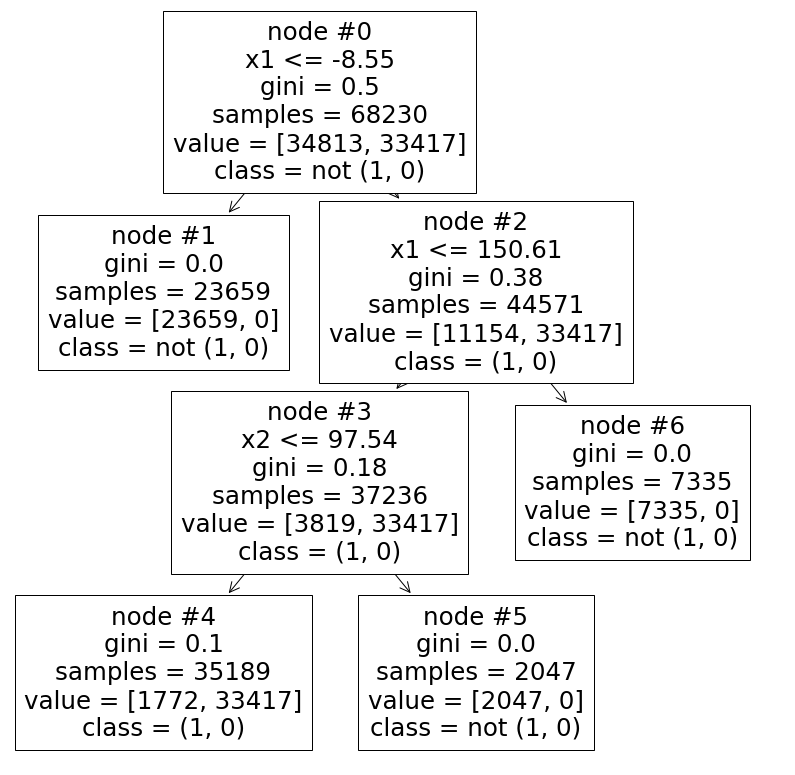

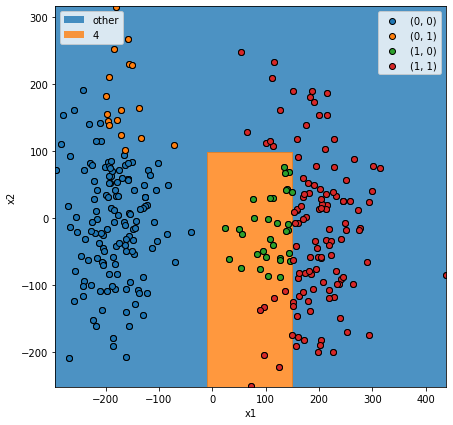

In [43]:
explain(max_depth=3)

node #6: if (x1 > -8.55) and (x1 <= 150.61) and (x2 > -108.19) and (x2 <= 97.54) then class (1, 0) (covers 1.0 of 33417 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      1.00      1.00     34813
      (1, 0)       1.00      1.00      1.00     33417

    accuracy                           1.00     68230
   macro avg       1.00      1.00      1.00     68230
weighted avg       1.00      1.00      1.00     68230


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      1.00      1.00       536
      (1, 0)       1.00      1.00      1.00        64

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



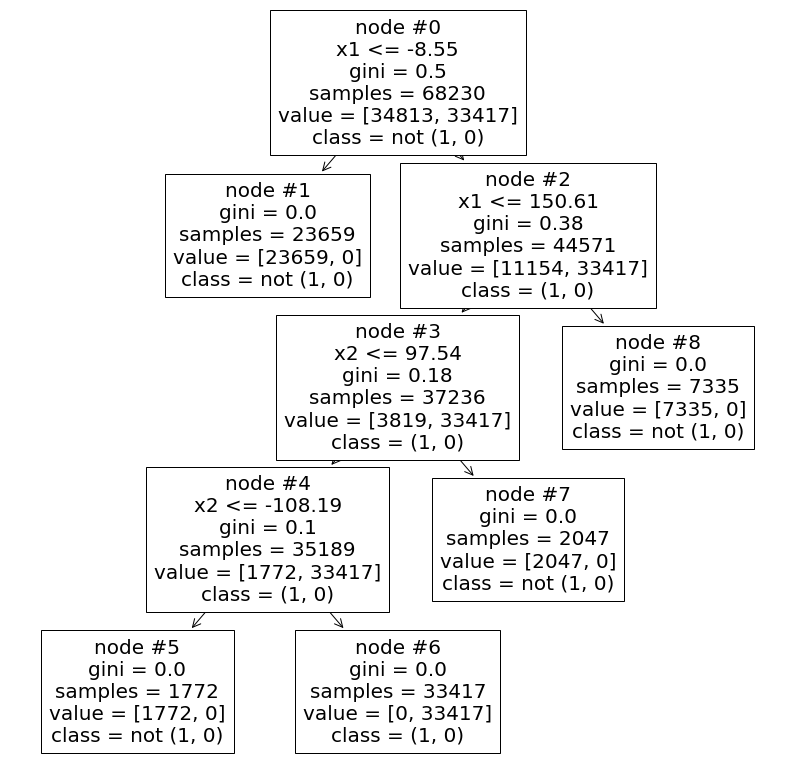

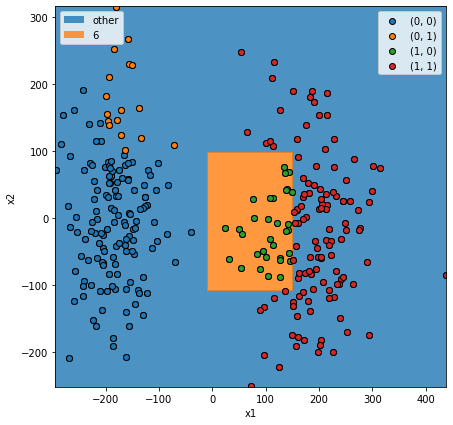

In [44]:
explain(max_depth=4)

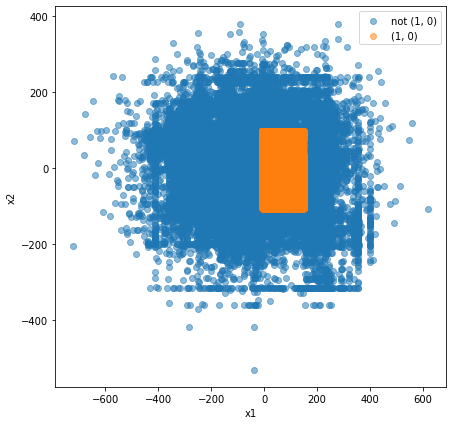

In [45]:
plot_diro2c_2d(explanation, 'x1', 'x2')

# Evaluation

## Selectivity
The rule set consists of the minimum set possible.

## Fidelity
- $(0,1)$:
    - difference 1 (rule of node 11): x1 lower bound differs by 0.11, upper bound by 0.01; x2 lower bound by 0.02
    - difference 3 (rule of node 5): x1 lower bound differs by 0.01, upper bound by 0.01; x2 upper bound by 0.06
- $(1,0)$:
    - difference 2 (rule of node 6): x1 upper bound differs by 0.13; x2 lower bound by 0.04, upper bound by 0.01

## Predictability
All areas with differences are covered and the explanation generalizes well.

## Persuability
The provided explanations are simple and good to interpret.